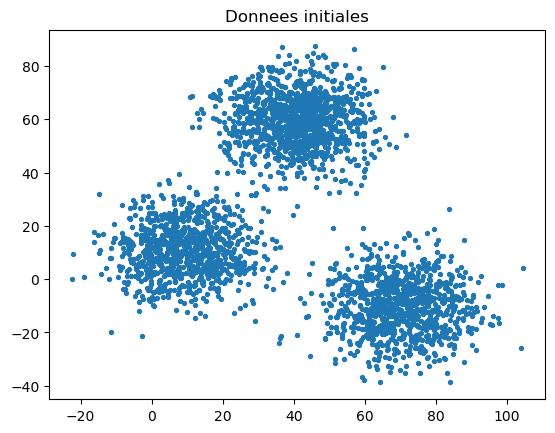

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
# Parser un fichier de donnees au format arff
# data est un tableau d ’ exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features ( dimension 2 )
# Ex : [[ - 0 . 499261 , -0 . 0612356 ] ,
# [ - 1 . 51369 , 0 . 265446 ] ,
# [ - 1 . 60321 , 0 . 362039 ] , .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster . On retire cette information
path = './'
databrut = arff.loadarff(open(path+"xclara.arff",'r'))
#datanp = [[x[0],x[1]] for x in databrut[0]]
datanp = np.array([[x[0], x[1]] for x in databrut[0]])  # <-- conversion en numpy array
# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [ - 0 . 499261 , -1 . 51369 , -1 . 60321 , ...]
# Ex pour f1 = [ - 0 . 0612356 , 0 . 265446 , 0 . 362039 , ...]
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
plt.scatter(f0,f1,s=8)
plt.title("Donnees initiales")
plt.show()

 Appel KMeans pour une valeur fixee de k 


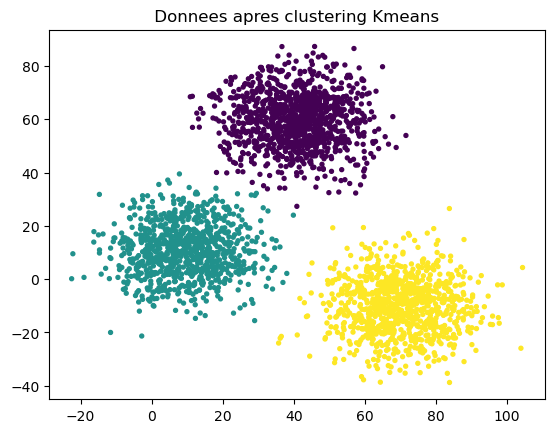

nb clusters =  3 , nb iter =  3 , runtime =  32.41  ms 


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn import cluster

# Les donnees sont dans datanp ( 2 dimensions )
# f0 : valeurs sur la premiere dimension
# f1 : valeur sur la deuxieme dimension

print ( " Appel KMeans pour une valeur fixee de k " )
tps1 = time.time()
k = 3
model = cluster.KMeans(n_clusters=k, init ='k-means++',n_init=10)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0,f1, c = labels, s = 8 )
plt.title( " Donnees apres clustering Kmeans " )
plt.show()
print( "nb clusters = " ,k , ", nb iter = " ,iteration , ", runtime = " , round((tps2 - tps1) * 1000 , 2 ) ," ms " )

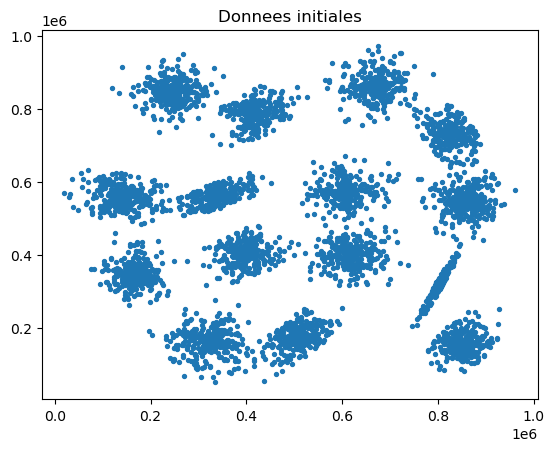

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import arff
# Parser un fichier de donnees au format arff
# data est un tableau d ’ exemples avec pour chacun
# la liste des valeurs des features
#
# Dans les jeux de donnees consideres :
# il y a 2 features ( dimension 2 )
# Ex : [[ - 0 . 499261 , -0 . 0612356 ] ,
# [ - 1 . 51369 , 0 . 265446 ] ,
# [ - 1 . 60321 , 0 . 362039 ] , .....
# ]
#
# Note : chaque exemple du jeu de donnees contient aussi un
# numero de cluster . On retire cette information
path = './'
databrut = arff.loadarff(open(path+"s-set1.arff",'r'))
#datanp = [[x[0],x[1]] for x in databrut[0]]
datanp = np.array([[x[0], x[1]] for x in databrut[0]])  # <-- conversion en numpy array
# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [ - 0 . 499261 , -1 . 51369 , -1 . 60321 , ...]
# Ex pour f1 = [ - 0 . 0612356 , 0 . 265446 , 0 . 362039 , ...]
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
plt.scatter(f0,f1,s=8)
plt.title("Donnees initiales")
plt.show()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import silhouette_score 
from sklearn import cluster

# Les donnees sont dans datanp ( 2 dimensions )
# f0 : valeurs sur la premiere dimension
# f1 : valeur sur la deuxieme dimension
A = np.zeros((20, 2))
B = np.zeros((20, 2))
print ( " Appel KMeans pour une valeur fixee de k " )
for i in range(3,23):
    k = i
    tps1 = time.time()
    #k = 3
    model = cluster.KMeans(n_clusters=k, init ='k-means++',n_init=10)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    score = silhouette_score(datanp,labels)
    #plt.scatter(f0,f1, c = labels, s = 8 )
    #plt.title( " Donnees apres clustering Kmeans " )
    #plt.show()
    tim = round((tps2 - tps1) * 1000 , 2 )
    print( "nb clusters = " ,k , ", nb iter = " ,iteration , ", runtime = " , tim ," ms, score : ", score )
    A[k-3,0] = k
    A[k-3,1] = score
    B[k-3,0] = k
    B[k-3,1] = tim

 Appel KMeans pour une valeur fixee de k 
nb clusters =  3 , nb iter =  4 , runtime =  33.09  ms, score :  0.41897065040495907
nb clusters =  4 , nb iter =  15 , runtime =  32.05  ms, score :  0.44523116293878723
nb clusters =  5 , nb iter =  15 , runtime =  37.68  ms, score :  0.46392568634109593
nb clusters =  6 , nb iter =  10 , runtime =  41.24  ms, score :  0.49480589956502163
nb clusters =  7 , nb iter =  6 , runtime =  45.23  ms, score :  0.5277848852128424
nb clusters =  8 , nb iter =  4 , runtime =  36.83  ms, score :  0.5664608196165074
nb clusters =  9 , nb iter =  14 , runtime =  39.55  ms, score :  0.5808541627972065
nb clusters =  10 , nb iter =  13 , runtime =  41.82  ms, score :  0.5977853892321484
nb clusters =  11 , nb iter =  3 , runtime =  42.69  ms, score :  0.6202483279143693
nb clusters =  12 , nb iter =  4 , runtime =  43.63  ms, score :  0.6373956265848799
nb clusters =  13 , nb iter =  4 , runtime =  48.16  ms, score :  0.6555240238821763
nb clusters =  14 , n

<function matplotlib.pyplot.xscale(value: 'str | ScaleBase', **kwargs) -> 'None'>

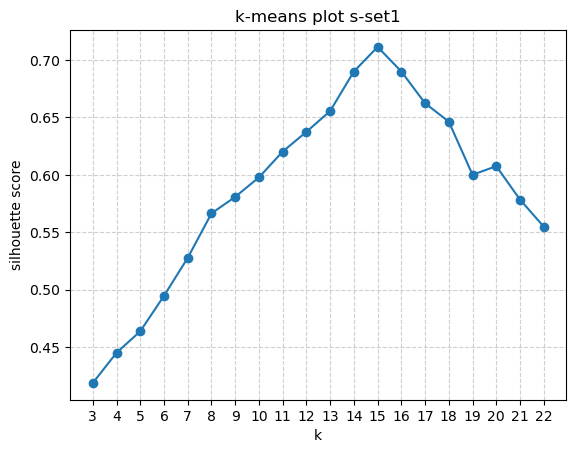

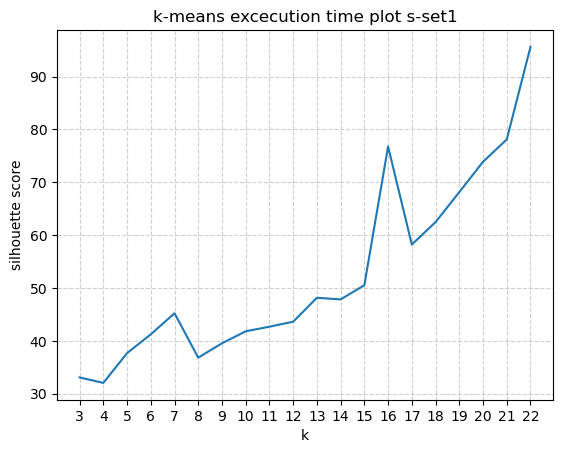

In [35]:
plt.plot(A[:,0], A[:, 1], marker='o')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means plot s-set1")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.xticks(range(int(min(A[:,0])), int(max(A[:,0])) + 1))
plt.xscale

plt.figure()
plt.plot(B[:,0], B[:, 1])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means excecution time plot s-set1")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.xticks(range(int(min(B[:,0])), int(max(B[:,0])) + 1))
plt.xscale


In [36]:

path = './'
databrut = arff.loadarff(open(path+"mopsi-finland.arff",'r'))
datanp = np.array([[x[0], x[1]] for x in databrut[0]])  # <-- conversion en numpy array
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
A2 = np.zeros((20, 2))
B2 = np.zeros((20, 2))
print ( " Appel KMeans pour une valeur fixee de k " )
for i in range(3,23):
    k = i
    tps1 = time.time()
    #k = 3
    model = cluster.KMeans(n_clusters=k, init ='k-means++',n_init=10)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    score = silhouette_score(datanp,labels)
    #plt.scatter(f0,f1, c = labels, s = 8 )
    #plt.title( " Donnees apres clustering Kmeans " )
    #plt.show()
    tim = round((tps2 - tps1) * 1000 , 2 )
    print( "nb clusters = " ,k , ", nb iter = " ,iteration , ", runtime = " , tim ," ms, score : ", score )
    A2[k-3,0] = k
    A2[k-3,1] = score
    B2[k-3,0] = k
    B2[k-3,1] = tim

 Appel KMeans pour une valeur fixee de k 
nb clusters =  3 , nb iter =  6 , runtime =  28.84  ms, score :  0.8015256665857015
nb clusters =  4 , nb iter =  8 , runtime =  42.35  ms, score :  0.8076014334776523
nb clusters =  5 , nb iter =  6 , runtime =  49.15  ms, score :  0.7966975914352101
nb clusters =  6 , nb iter =  4 , runtime =  46.95  ms, score :  0.7982367089768223
nb clusters =  7 , nb iter =  6 , runtime =  50.17  ms, score :  0.8064948649598473
nb clusters =  8 , nb iter =  4 , runtime =  48.63  ms, score :  0.8183338616435027
nb clusters =  9 , nb iter =  4 , runtime =  50.39  ms, score :  0.7103199171510777
nb clusters =  10 , nb iter =  6 , runtime =  60.07  ms, score :  0.7142241294911216
nb clusters =  11 , nb iter =  8 , runtime =  62.32  ms, score :  0.738892796772105
nb clusters =  12 , nb iter =  10 , runtime =  63.02  ms, score :  0.7394439219690057
nb clusters =  13 , nb iter =  7 , runtime =  67.58  ms, score :  0.7609525880054777
nb clusters =  14 , nb iter = 

<function matplotlib.pyplot.xscale(value: 'str | ScaleBase', **kwargs) -> 'None'>

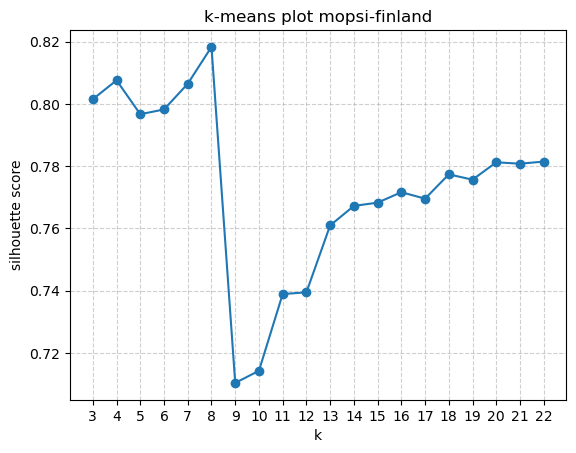

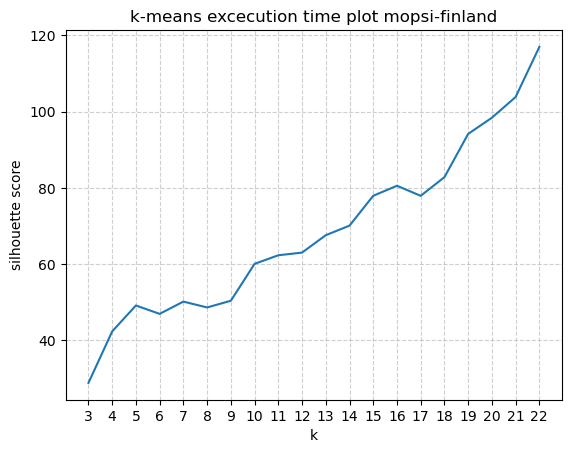

In [37]:
plt.plot(A2[:,0], A2[:, 1], marker='o')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means plot mopsi-finland")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.xticks(range(int(min(A2[:,0])), int(max(A2[:,0])) + 1))
plt.xscale

plt.figure()
plt.plot(B2[:,0], B2[:, 1])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means excecution time plot mopsi-finland")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.xticks(range(int(min(B2[:,0])), int(max(B2[:,0])) + 1))
plt.xscale

In [38]:
path = './'
databrut = arff.loadarff(open(path+"smile1.arff",'r'))
datanp = np.array([[x[0], x[1]] for x in databrut[0]])  # <-- conversion en numpy array
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
A3 = np.zeros((20, 2))
B3 = np.zeros((20, 2))
print ( " Appel KMeans pour une valeur fixee de k " )
for i in range(3,23):
    k = i
    tps1 = time.time()
    #k = 3
    model = cluster.KMeans(n_clusters=k, init ='k-means++',n_init=10)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    score = silhouette_score(datanp,labels)
    #plt.scatter(f0,f1, c = labels, s = 8 )
    #plt.title( " Donnees apres clustering Kmeans " )
    #plt.show()
    tim = round((tps2 - tps1) * 1000 , 2 )
    print( "nb clusters = " ,k , ", nb iter = " ,iteration , ", runtime = " , tim ," ms, score : ", score )
    A3[k-3,0] = k
    A3[k-3,1] = score
    B3[k-3,0] = k
    B3[k-3,1] = tim

 Appel KMeans pour une valeur fixee de k 
nb clusters =  3 , nb iter =  5 , runtime =  22.67  ms, score :  0.6393006957752178
nb clusters =  4 , nb iter =  12 , runtime =  28.26  ms, score :  0.6262905992435078
nb clusters =  5 , nb iter =  17 , runtime =  35.74  ms, score :  0.6361550229798202
nb clusters =  6 , nb iter =  16 , runtime =  32.61  ms, score :  0.6376087040170163
nb clusters =  7 , nb iter =  14 , runtime =  40.42  ms, score :  0.6497647738350377
nb clusters =  8 , nb iter =  20 , runtime =  38.3  ms, score :  0.6673754885768187
nb clusters =  9 , nb iter =  8 , runtime =  39.13  ms, score :  0.6754172537178806
nb clusters =  10 , nb iter =  9 , runtime =  37.97  ms, score :  0.6861959736398305
nb clusters =  11 , nb iter =  9 , runtime =  39.76  ms, score :  0.6959107631330308
nb clusters =  12 , nb iter =  10 , runtime =  50.21  ms, score :  0.7093399973239998
nb clusters =  13 , nb iter =  8 , runtime =  38.67  ms, score :  0.6996913272635767
nb clusters =  14 , nb it

<function matplotlib.pyplot.xscale(value: 'str | ScaleBase', **kwargs) -> 'None'>

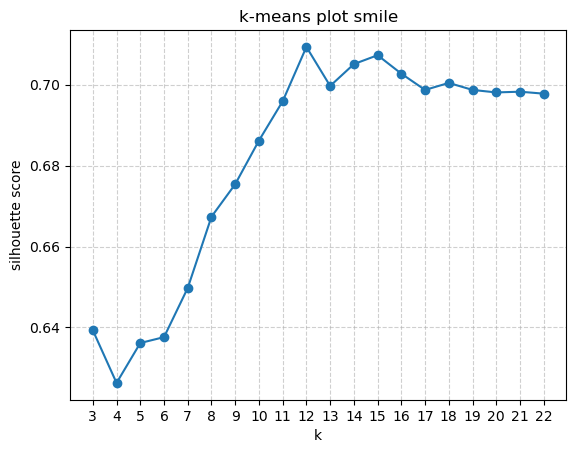

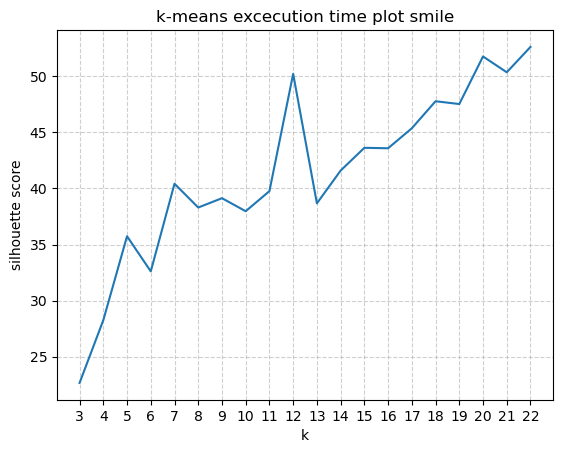

In [39]:
plt.plot(A3[:,0], A3[:, 1], marker='o')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means plot smile")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.xticks(range(int(min(A3[:,0])), int(max(A3[:,0])) + 1))
plt.xscale

plt.figure()
plt.plot(B3[:,0], B3[:, 1])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means excecution time plot smile")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.xticks(range(int(min(B3[:,0])), int(max(B3[:,0])) + 1))
plt.xscale

 Appel KMeans pour une valeur fixee de k = 15


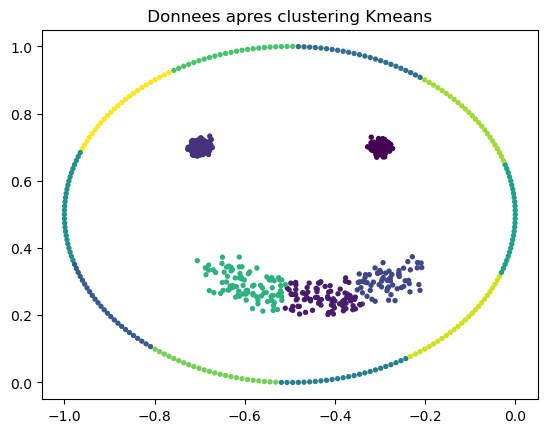

nb clusters =  15 , nb iter =  5 , runtime =  44.3  ms 


In [40]:
path = './'
databrut = arff.loadarff(open(path+"smile1.arff",'r'))
#datanp = [[x[0],x[1]] for x in databrut[0]]
datanp = np.array([[x[0], x[1]] for x in databrut[0]])  # <-- conversion en numpy array
# Affichage en 2D
# Extraire chaque valeur de features pour en faire une liste
# Ex pour f0 = [ - 0 . 499261 , -1 . 51369 , -1 . 60321 , ...]
# Ex pour f1 = [ - 0 . 0612356 , 0 . 265446 , 0 . 362039 , ...]
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
print ( " Appel KMeans pour une valeur fixee de k = 15" )
tps1 = time.time()
k = 15
model = cluster.KMeans(n_clusters=k, init ='k-means++',n_init=10)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0,f1, c = labels, s = 8 )
plt.title( " Donnees apres clustering Kmeans " )
plt.show()
print( "nb clusters = " ,k , ", nb iter = " ,iteration , ", runtime = " , round((tps2 - tps1) * 1000 , 2 ) ," ms " )

In [46]:
path = './'
databrut = arff.loadarff(open(path+"golfball.arff",'r'))
datanp = np.array([[x[0], x[1]] for x in databrut[0]])  # <-- conversion en numpy array
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
A4 = np.zeros((21, 2))
B4 = np.zeros((21, 2))
for i in range(2,23):
    k = i
    tps1 = time.time()
    #k = 3
    model = cluster.KMeans(n_clusters=k, init ='k-means++',n_init=10)
    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    score = silhouette_score(datanp,labels)
    #plt.scatter(f0,f1, c = labels, s = 8 )
    #plt.title( " Donnees apres clustering Kmeans " )
    #plt.show()
    tim = round((tps2 - tps1) * 1000 , 2 )
    print( "nb clusters = " ,k , ", nb iter = " ,iteration , ", runtime = " , tim ," ms, score : ", score )
    A4[k-2,0] = k
    A4[k-2,1] = score
    B4[k-2,0] = k
    B4[k-2,1] = tim

nb clusters =  2 , nb iter =  5 , runtime =  21.15  ms, score :  0.3635009216549467
nb clusters =  3 , nb iter =  6 , runtime =  30.99  ms, score :  0.405574186688695
nb clusters =  4 , nb iter =  8 , runtime =  27.79  ms, score :  0.40232693437195305
nb clusters =  5 , nb iter =  11 , runtime =  32.52  ms, score :  0.3888407506904909
nb clusters =  6 , nb iter =  8 , runtime =  39.92  ms, score :  0.37257355758563515
nb clusters =  7 , nb iter =  8 , runtime =  42.51  ms, score :  0.4025926782673126
nb clusters =  8 , nb iter =  11 , runtime =  48.41  ms, score :  0.3936737052845625
nb clusters =  9 , nb iter =  13 , runtime =  50.51  ms, score :  0.3822385424130777
nb clusters =  10 , nb iter =  14 , runtime =  66.48  ms, score :  0.37012119585078196
nb clusters =  11 , nb iter =  12 , runtime =  51.98  ms, score :  0.3576022207324177
nb clusters =  12 , nb iter =  9 , runtime =  66.42  ms, score :  0.3653728092044846
nb clusters =  13 , nb iter =  16 , runtime =  60.06  ms, score : 

<function matplotlib.pyplot.xscale(value: 'str | ScaleBase', **kwargs) -> 'None'>

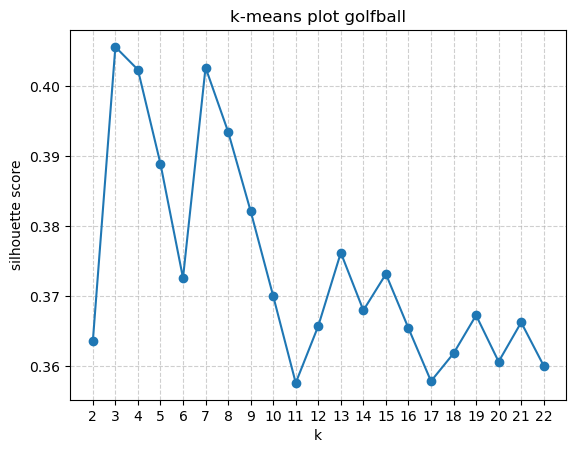

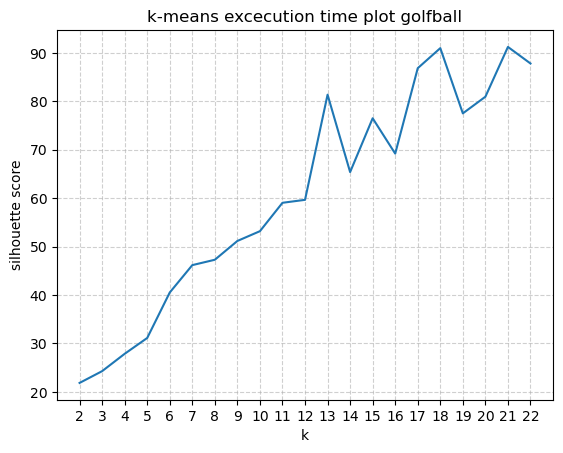

In [42]:
plt.plot(A4[:,0], A4[:, 1], marker='o')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means plot golfball")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.xticks(range(int(min(A4[:,0])), int(max(A4[:,0])) + 1))
plt.xscale

plt.figure()
plt.plot(B4[:,0], B4[:, 1])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means excecution time plot golfball")
plt.xlabel("k")
plt.ylabel("silhouette score")
plt.xticks(range(int(min(B4[:,0])), int(max(B4[:,0])) + 1))
plt.xscale

 Appel KMeans pour une valeur fixee de k = 3


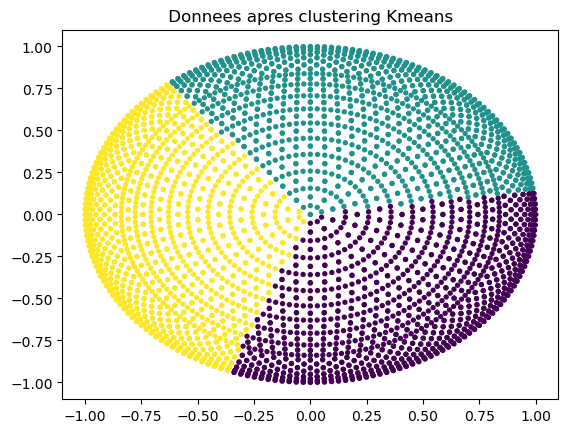

nb clusters =  3 , nb iter =  6 , runtime =  29.8  ms 


In [54]:
path = './'
databrut = arff.loadarff(open(path+"golfball.arff",'r'))
datanp = np.array([[x[0], x[1]] for x in databrut[0]])  # <-- conversion en numpy array
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
print ( " Appel KMeans pour une valeur fixee de k = 3" )
tps1 = time.time()
k = 3
model = cluster.KMeans(n_clusters=k, init ='k-means++',n_init=10)
model.fit(datanp)
tps2 = time.time()
labels = model.labels_
iteration = model.n_iter_
plt.scatter(f0,f1, c = labels, s = 8 )
plt.title( " Donnees apres clustering Kmeans " )
plt.show()
print( "nb clusters = " ,k , ", nb iter = " ,iteration , ", runtime = " , round((tps2 - tps1) * 1000 , 2 ) ," ms " )

 Dendrogramme ' single ' donnees initiales 


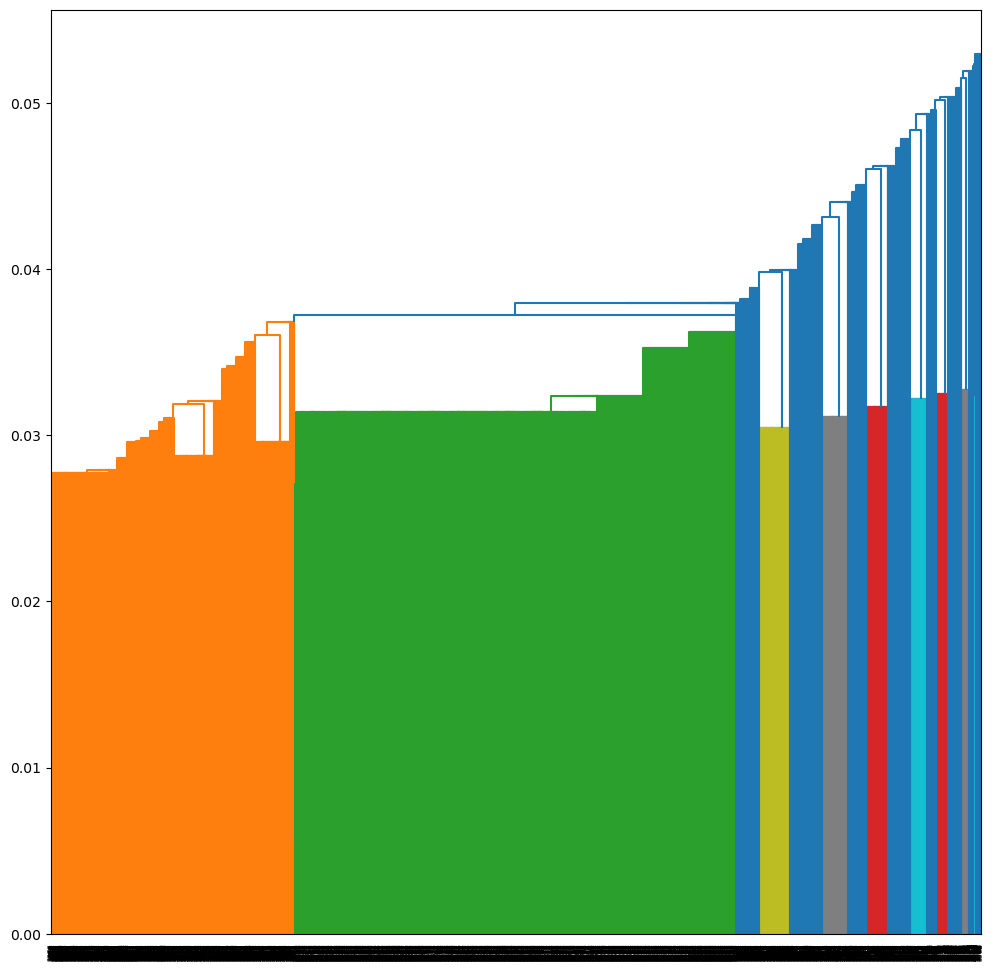

In [55]:
import scipy.cluster.hierarchy as shc
# Donnees dans datanp
print(" Dendrogramme ' single ' donnees initiales ")
linked_mat = shc.linkage(datanp,'single')
plt.figure(figsize = (12,12))
shc.dendrogram(linked_mat ,
orientation = 'top' ,
distance_sort = 'descending',
show_leaf_counts = False )
plt.show()

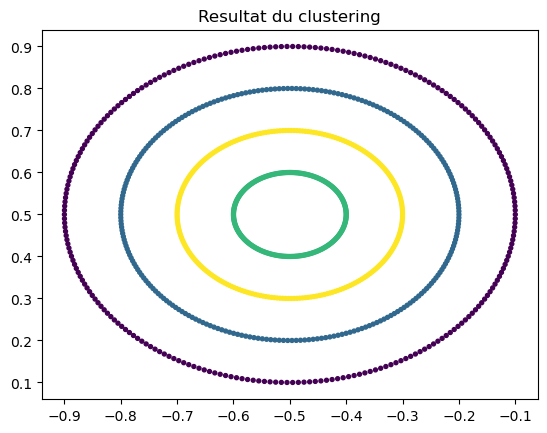

nb clusters =  4  , nb feuilles =  1000  runtime =  5.62  ms 


In [62]:
import time 
path = './'
databrut = arff.loadarff(open(path+"dartboard1.arff",'r'))
datanp = np.array([[x[0], x[1]] for x in databrut[0]])  # <-- conversion en numpy array
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne
# set distance_threshold ( 0 ensures we compute the full tree )
tps1 = time.time ()
model = cluster.AgglomerativeClustering(distance_threshold=None, linkage='single', n_clusters=4)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_
# Affichage clustering
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Resultat du clustering")
plt.show()
print("nb clusters = ",k," , nb feuilles = ", leaves , " runtime = ", round((tps2 - tps1)*1000, 2)," ms ")
# set the number of clusters
k = 4
tps1 = time.time()
model = cluster.AgglomerativeClustering(linkage='single', n_clusters=k)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_

In [106]:
path = './'
databrut = arff.loadarff(open(path+"smile1.arff",'r'))
datanp = np.array([[x[0], x[1]] for x in databrut[0]])
f0 = datanp[:,0] # tous les elements de la premiere colonne
f1 = datanp[:,1] # tous les elements de la deuxieme colonne

# set distance_threshold ( 0 ensures we compute the full tree )

A5 = np.zeros((47, 2))
B5 = np.zeros((47, 2))
for i in range(2,48):
    t = i/50
    k = i
    tps1 = time.time ()
    model = cluster.AgglomerativeClustering(distance_threshold=t, linkage='single', n_clusters=None)
    model = model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    k2 = model.n_clusters_
    leaves = model.n_leaves_
    tim = round((tps2 - tps1) * 1000 , 2 )
    print( "nb clusters = " ,k , ", nb iter = " ,iteration , ", runtime = " , tim ," ms, score : ", score )
    A5[k-2,0] = k
    A5[k-2,1] = score
    B5[k-2,0] = k/20
    B5[k-2,1] = tim

nb clusters =  2 , nb iter =  6 , runtime =  5.05  ms, score :  0.36031619221156863
nb clusters =  3 , nb iter =  6 , runtime =  5.03  ms, score :  0.36031619221156863
nb clusters =  4 , nb iter =  6 , runtime =  6.46  ms, score :  0.36031619221156863
nb clusters =  5 , nb iter =  6 , runtime =  4.68  ms, score :  0.36031619221156863
nb clusters =  6 , nb iter =  6 , runtime =  4.51  ms, score :  0.36031619221156863
nb clusters =  7 , nb iter =  6 , runtime =  5.16  ms, score :  0.36031619221156863
nb clusters =  8 , nb iter =  6 , runtime =  4.6  ms, score :  0.36031619221156863
nb clusters =  9 , nb iter =  6 , runtime =  4.52  ms, score :  0.36031619221156863
nb clusters =  10 , nb iter =  6 , runtime =  4.46  ms, score :  0.36031619221156863
nb clusters =  11 , nb iter =  6 , runtime =  5.2  ms, score :  0.36031619221156863
nb clusters =  12 , nb iter =  6 , runtime =  4.58  ms, score :  0.36031619221156863
nb clusters =  13 , nb iter =  6 , runtime =  4.47  ms, score :  0.36031619

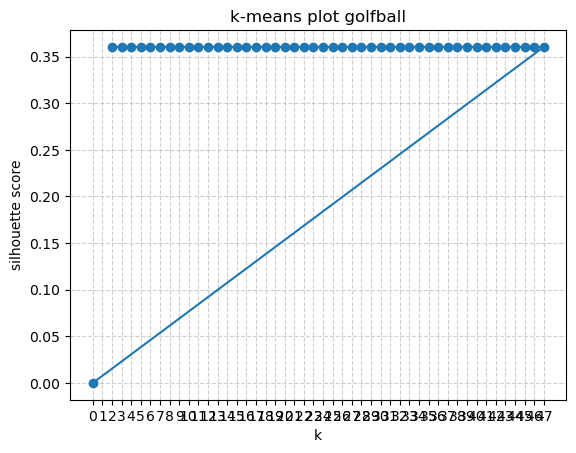

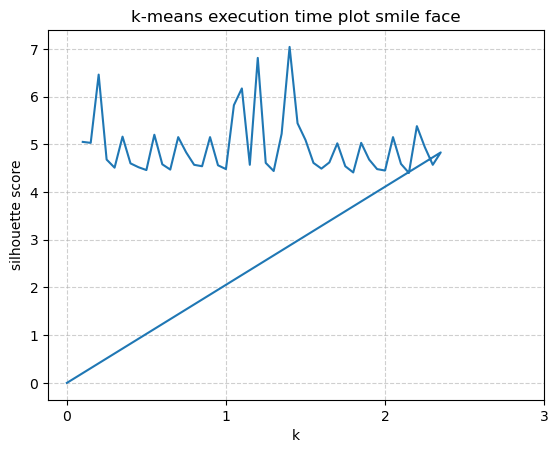

In [107]:

plt.plot(A5[:,0], A5[:,1], marker='o')
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means plot golfball")
plt.xlabel("k")
plt.ylabel("silhouette score")

xmin = min(A5[:,0])
xmax = max(A5[:,0])
plt.xticks(np.arange(xmin, xmax + 1, 1))


plt.show()

plt.figure()
plt.plot(B5[:,0], B5[:,1])
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.title("k-means execution time plot smile face")
plt.xlabel("k")
plt.ylabel("silhouette score")

xmin_b = min(B5[:,0])
xmax_b = max(B5[:,0])
plt.xticks(np.arange(xmin_b, xmax_b + 1, 1))

plt.show()


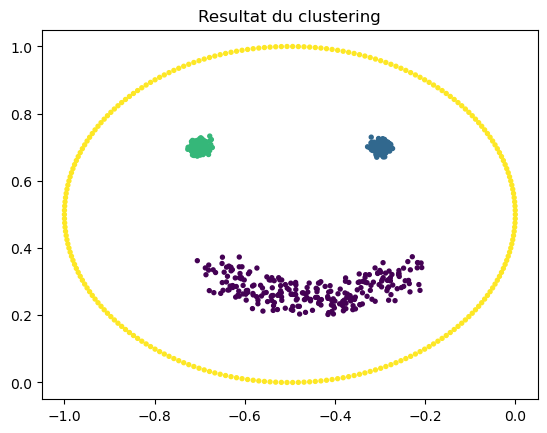

nb clusters =  4  , nb feuilles =  1000  runtime =  8.22  ms 


In [108]:
tps1 = time.time ()
model = cluster.AgglomerativeClustering(distance_threshold=0.05, linkage='single', n_clusters=None)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
k = model.n_clusters_
leaves = model.n_leaves_
# Affichage clustering
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Resultat du clustering")
plt.show()
print("nb clusters = ",k," , nb feuilles = ", leaves , " runtime = ", round((tps2 - tps1)*1000, 2)," ms ")
# set the number of clusters
tps1 = time.time()
model = cluster.AgglomerativeClustering(linkage='single', n_clusters=k)
model = model.fit(datanp)
tps2 = time.time()
labels = model.labels_
kres = model.n_clusters_
leaves = model.n_leaves_